In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as math
from sklearn.datasets import fetch_california_housing

In [2]:
def four_million_sample_means(population, sample_size):
    "A true sample distribution of means is too large to calculate in class"
    return np.mean(np.random.choice(population, size=(4000000, sample_size)), axis=1)

In [3]:
def plot_histogram(title, distribution):
    "Plots a simple histogram with 300 bins"
    fig, axis = plt.subplots()
    axis.set_title(title)
    axis.hist(distribution, bins=300)

def print_calculation(title, calculation):
    print(title + ": " + str(calculation))

# The Central Limit Theorem

## The Goal: How Do We Test for Statistical Significance?

## Our Method

<div style="display: flex; align-items: center;">
  <div style="flex: 1;">
    <img src="normal_distribution.jpg" alt="Normal Distribution diagram with μ, σ, and percentages" width="2000">
      <span style="font-size: 0.8em; font-style: italic; text-align: left; display: block;">(Image source: https://static.vecteezy.com/system/resources/previews/007/695/520/original/gauss-distribution-standard-normal-distribution-gaussian-bell-graph-curve-business-and-marketing-concept-math-probability-theory-editable-stroke-illustration-isolated-on-white-background-vector.jpg)</span>
  </div>
  <div style="flex: 1">
    <ol style="margin-top: 0;">
      <li>Represent our problem as a normal distribution.</li>
      <li>Estimate the σ² (the variance) of that distribution.</li>
      <li>Estimate the distance of our result from μ (the mean), measured in σ (standard deviations).</li>
      <li>Check if this distance exceeds our threshold of statistical significance.</li>
    </ol>
  </div>
</div>

**What is "statistical significance?"**

When a relationship we observe in our data is likely not present due to random chance.

**How likely?**

We get to decide, but in the social sciences, the threshold is usually 0.95 or 95%.

**Used in a sentence:**

"Our level of confidence that the relationship in our data *did not occur by random chance* is 95%."

**Another common formulation:**

You will also see statistical significance expressed in inverse terms using α. e.g. if we want 95% confidence our result didn't occur due to random chance, we would decide "to conduct our study using α = 0.05."

## What is the normal distribution?

<img src="normal_distribution.jpg" alt="Normal Distribution diagram with μ, σ, and percentages" width="80%">

### An experiment to check μ:

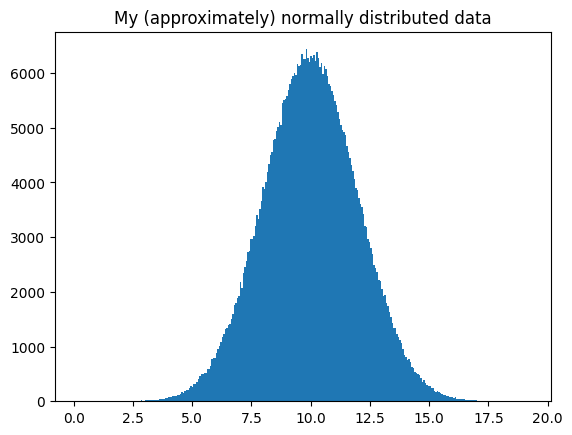

In [4]:
normally_distributed_data = np.random.normal(loc=10, scale=2, size=500000)
plot_histogram("My (approximately) normally distributed data", normally_distributed_data)

In [5]:
print_calculation(title="μ (mean) of the data", calculation=np.mean(normally_distributed_data)) 

μ (mean) of the data: 9.997462190834797


### An experiment to check σ:

<img src="normal_distribution.jpg" alt="Normal Distribution diagram with μ, σ, and percentages" width="80%">

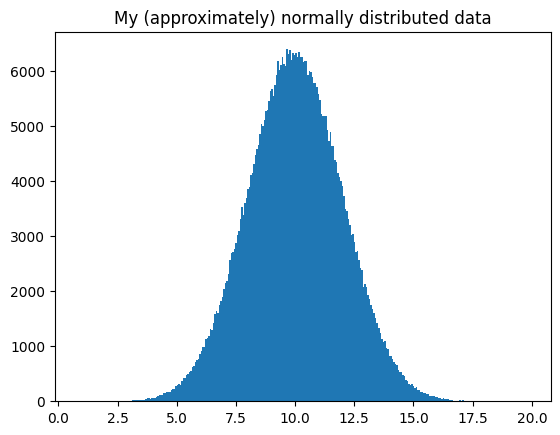

In [6]:
normally_distributed_data = np.random.normal(loc=10, scale=2, size=500000)
plot_histogram("My (approximately) normally distributed data", normally_distributed_data)

In [7]:
def percentage_within(distribution, lower_bound, upper_bound):
    values_between = 0
    total_values = len(distribution)
    
    for datapoint in distribution:
        if datapoint >= lower_bound and datapoint <= upper_bound:
            values_between += 1
        else:
            values_between += 0
            
    return values_between / total_values

<img src="normal_distribution.jpg" alt="Normal Distribution diagram with μ, σ, and percentages" width="50%">

In [8]:
mean = np.mean(normally_distributed_data)
standard_deviation = np.std(normally_distributed_data)

print_calculation(
    "Percentage within 1σ of μ", 
    percentage_within(
        normally_distributed_data,
        mean - (1 * standard_deviation), 
        mean + (1 * standard_deviation)
    )
)

Percentage within 1σ of μ: 0.682088


## Our Method

<div style="display: flex; align-items: center;">
  <div style="flex: 1;">
    <img src="normal_distribution.jpg" alt="Normal Distribution diagram with μ, σ, and percentages" width="2000">
  </div>
  <div style="flex: 1">
    <ol style="margin-top: 0;">
          <li>Represent our problem as a normal distribution.</li>
          <li>Estimate the σ² (the variance) of that distribution.</li>
          <li>Estimate the distance of our result from μ (the mean), measured in σ (standard deviations).</li>
        <li>Check if this distance exceeds our threshold of statistical significance.</li>
    </ol>
  </div>
</div>

# (Finally) The Central Limit Theorem

Given a sufficiently large sample:
1. The means of the samples in a set of samples (the
sample means) will be approximately normally
distributed,
2. This normal distribution will have a mean close to the
mean the population, and
3. The variance of the sample means will be close to the
variance of the population divided by the square root of
the sample size.

<span style="font-size: 0.8em; font-style: italic; text-align: left; display: block;">(Source https://ocw.mit.edu/courses/6-0002-introduction-to-computational-thinking-and-data-science-fall-2016/resources/mit6_0002f16_lec8/)</span>

# What does this mean?

Given a sufficiently large sample:
1. The means of the samples in a set of samples (the
sample means) will be approximately normally
distributed,

# Demonstration!

In [ ]:
bimodal_population = np.concatenate([np.random.standard_normal(5000), 10 + 2 * np.random.standard_normal(5000)])
plot_histogram("Bimodal Population", bimodal_population)

# Demonstration!

In [ ]:
sample_sizes = [1,2,4,10,30,60,120,200]

for sample_size in sample_sizes:
    plot_histogram(
        f"Rough sampling distribution of the mean for sample size {sample_size}:", 
        four_million_sample_means(bimodal_population, sample_size)
    )

# Demonstration #2!

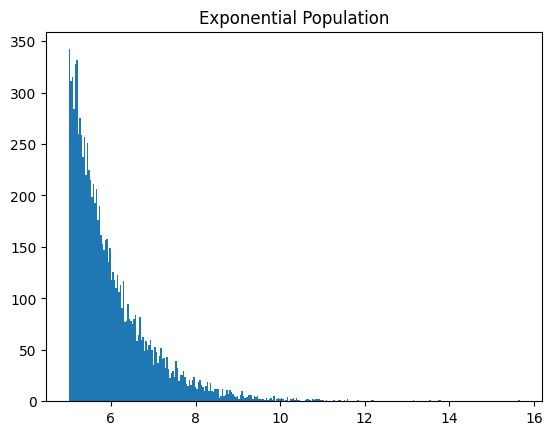

In [72]:
exponential_population = np.random.exponential(size=10000) + 5
plot_histogram("Exponential Population", exponential_population)

# Demonstration #2!

In [ ]:
sample_sizes = [1,2,4,10,30,60,120,200]

for sample_size in sample_sizes:
    plot_histogram(
        f"Rough sampling distribution of the mean for sample size {sample_size}:", 
        four_million_sample_means(exponential_population, sample_size)
    )

# Why "four million samples"?

- The "sampling distribution of the mean" is the distribution we would get if we collected **every possible** sample of our chosen sample size from the population and plotted their means.
- The formula for how many samples this would be is C(p,n) = p! / (n! * (p-n)!).
- 4! means four factorial, e.g. 1 x 2 x 3 x 4.

In [21]:
import math

math.factorial(4)

24

In [22]:
population_size = 10_000
sample_size = 120

total_samples = math.factorial(population_size) / (math.factorial(sample_size) * math.factorial(population_size - sample_size))
print(f"{total_samples:,.0f}")

72,992,339,297,213,570,723,254,202,373,472,021,299,701,224,084,300,031,456,672,032,247,147,510,771,563,159,117,677,316,779,904,341,486,629,475,390,518,373,774,139,742,822,756,825,565,113,120,541,493,582,788,180,844,121,989,145,504,182,838,601,594,728,784,436,865,033,569,806,974,956,054,207,059,954,000,438,626,604,768,005,012,720,823,788,448,421,592,468,041,613,682,147,328


# (Or, according to https://benpittstoller.com/Misc/LargeNumbers.html):

seventy-two duononagintillion nine hundred ninety-two unnonagintillion three hundred thirty-nine nonagintillion two hundred ninety-seven novemoctogintillion two hundred thirteen octooctogintillion five hundred seventy septemoctogintillion seven hundred twenty-three sexoctogintillion two hundred fifty-four quinquaoctogintillion two hundred two quattuoroctogintillion three hundred seventy-three treoctogintillion four hundred seventy-two duooctogintillion twenty-one unoctogintillion two hundred ninety-nine octogintillion seven hundred one novenseptuagintillion two hundred twenty-four octoseptuagintillion eighty-four septenseptuagintillion three hundred seseptuagintillion thirty-one quinquaseptuagintillion four hundred fifty-six quattuorseptuagintillion six hundred seventy-two treseptuagintillion thirty-two duoseptuagintillion two hundred forty-seven unseptuagintillion one hundred forty-seven septuagintillion five hundred ten novensexagintillion seven hundred seventy-one octosexagintillion five hundred sixty-three septensexagintillion one hundred fifty-nine sesexagintillion one hundred seventeen quinquasexagintillion six hundred seventy-seven quattuorsexagintillion three hundred sixteen tresexagintillion seven hundred seventy-nine duosexagintillion nine hundred four unsexagintillion three hundred forty-one sexagintillion four hundred eighty-six novenquinquagintillion six hundred twenty-nine octoquinquagintillion four hundred seventy-five septenquinquagintillion three hundred ninety sesquinquagintillion five hundred eighteen quinquaquinquagintillion three hundred seventy-three quattuorquinquagintillion seven hundred seventy-four tresquinquagintillion one hundred thirty-nine duoquinquagintillion seven hundred forty-two unquinquagintillion eight hundred twenty-two quinquagintillion seven hundred fifty-six novenquadragintillion eight hundred twenty-five octoquadragintillion five hundred sixty-five septenquadragintillion one hundred thirteen sesquadragintillion one hundred twenty quinquaquadragintillion five hundred forty-one quattuorquadragintillion four hundred ninety-three tresquadragintillion five hundred eighty-two duoquadragintillion seven hundred eighty-eight unquadragintillion one hundred eighty quadragintillion eight hundred forty-four noventrigintillion one hundred twenty-one octotrigintillion nine hundred eighty-nine septentrigintillion one hundred forty-five sestrigintillion five hundred four quinquatrigintillion one hundred eighty-two quattuortrigintillion eight hundred thirty-eight trestrigintillion six hundred one duotrigintillion five hundred ninety-four untrigintillion seven hundred twenty-eight trigintillion seven hundred eighty-four novemvigintillion four hundred thirty-six octovigintillion eight hundred sixty-five septemvigintillion thirty-three sesvigintillion five hundred sixty-nine quinquavigintillion eight hundred six quattuorvigintillion nine hundred seventy-four tresvigintillion nine hundred fifty-six duovigintillion fifty-four unvigintillion two hundred seven vigintillion fifty-nine novendecillion nine hundred fifty-four octodecillion four hundred thirty-eight sedecillion six hundred twenty-six quinquadecillion six hundred four quattuordecillion seven hundred sixty-eight tredecillion five duodecillion twelve undecillion seven hundred twenty decillion eight hundred twenty-three nonillion seven hundred eighty-eight octillion four hundred forty-eight septillion four hundred twenty-one sextillion five hundred ninety-two quintillion four hundred sixty-eight quadrillion forty-one trillion six hundred thirteen billion six hundred eighty-two million one hundred forty-seven thousand three hundred twenty-eight

# How many samples do we actually take?

- One!

- And if we were going to take the crazy number of samples mentioned above, it would be **much** easier just to measure the entire population.

- As researchers, we likely do not have the resources to measure an entire population, or even to take more than one, or (if we are lucky) a small handful of samples.

## However, our result is still very helpful for our method!

<div style="display: flex; align-items: center;">
  <div style="flex: 1;">
    <img src="normal_distribution.jpg" alt="Normal Distribution diagram with μ, σ, and percentages" width="2000">
      <span style="font-size: 0.8em; font-style: italic; text-align: left; display: block;">(Image source: https://static.vecteezy.com/system/resources/previews/007/695/520/original/gauss-distribution-standard-normal-distribution-gaussian-bell-graph-curve-business-and-marketing-concept-math-probability-theory-editable-stroke-illustration-isolated-on-white-background-vector.jpg)</span>
  </div>
  <div style="flex: 1">
    <ol style="margin-top: 0;">
      <li>Represent our problem as a normal distribution.</li>
      <li>Estimate the σ² (the variance) of that distribution.</li>
      <li>Estimate the distance of our result from μ (the mean), measured in σ (standard deviations).</li>
      <li>Check if this distance exceeds our threshold of statistical significance.</li>
    </ol>
  </div>
</div>

Certainly. Let's break this down in a simple, intuitive way:

1. Binary outcomes:
   We're dealing with only two possible results: success (1) or failure (0).

2. Probability:
   p = probability of success
   1-p = probability of failure

3. Variance calculation:
   Variance measures the average squared deviation from the mean.

4. Mean for binary outcome:
   The mean (μ) is simply p, as that's the expected value.

5. Calculating deviations:
   - For a success (1): The deviation is (1 - p)
   - For a failure (0): The deviation is (0 - p) = -p

6. Squaring these deviations:
   - For success: (1 - p)²
   - For failure: (-p)² = p²

7. Weighted average of squared deviations:
   Variance = p(1 - p)² + (1-p)(p²)

8. Simplifying:
   = p(1 - 2p + p²) + p² - p³
   = p - 2p² + p³ + p² - p³
   = p - p²
   = p(1 - p)

This p(1-p) formula captures the spread of binary data elegantly:
- When p = 0.5, variance is at its maximum (0.25), reflecting maximum uncertainty.
- As p approaches 0 or 1, variance decreases, reflecting more certainty.

This simple formula encapsulates the variability inherent in binary outcomes, which is why it's used as the variance in the standard error calculation for proportions.

We don't know what the mean is, but we can approximate the stdev so that we *catch* the population within a certain range of the confidence interval we construct.